In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Задание 3. 

Поработайте с датасетом House Sales in King County. Обратите внимание, что не все признаки в датасете полезны. Целевая переменная - очевидно, price. 

In [33]:
house_sales_data = pd.read_csv("kc_house_data.csv")
house_sales_data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1801,7805460030,20150223T000000,615000.0,3,2.50,2250,10171,2.0,0,0,...,9,2250,0,1987,0,98006,47.5613,-122.110,2440,13390
7215,9433000460,20141007T000000,779950.0,4,2.75,2990,4298,2.0,0,0,...,9,2990,0,2014,0,98052,47.7101,-122.108,2990,4837
10205,40000228,20141015T000000,221900.0,2,1.00,780,6727,1.0,0,0,...,6,780,0,1939,0,98168,47.4733,-122.281,1860,10124
19573,5422560850,20141210T000000,541338.0,3,2.50,2060,8123,2.0,0,0,...,8,1010,1050,1977,0,98052,47.6642,-122.130,1760,6170
16664,1568100670,20150320T000000,395900.0,3,1.75,1880,8706,1.0,0,0,...,7,940,940,1927,0,98155,47.7362,-122.292,1880,7200
9345,1328300040,20150312T000000,317500.0,6,1.75,2540,8400,1.0,0,0,...,8,1340,1200,1977,0,98058,47.4414,-122.129,1900,7695
3234,3123039089,20140715T000000,252000.0,2,1.00,940,15450,1.0,0,0,...,6,940,0,1926,0,98070,47.4408,-122.461,1370,34820
9394,5100403876,20140820T000000,840000.0,3,2.50,2060,9715,2.0,0,0,...,8,2060,0,1924,2006,98115,47.6961,-122.316,1240,7072
11572,6645950070,20150401T000000,1450000.0,4,3.50,5000,38012,2.0,0,0,...,11,3610,1390,2004,0,98029,47.5540,-122.036,3850,18054
826,3362400640,20150512T000000,825000.0,3,1.75,2010,3090,1.5,0,0,...,7,1510,500,1926,0,98103,47.6820,-122.348,1600,3150


In [34]:
house_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [35]:
house_sales_data['justdate'] = house_sales_data.date.str.extract(r'^(.+?)T', expand=True)

In [36]:
house_sales_data.drop('date', axis=1, inplace=True) 
house_sales_data['justdate'] = pd.to_numeric(house_sales_data['justdate']) # перевожу значения из object в числа

In [37]:
house_sales_data.drop('id', axis=1, inplace=True)

In [38]:
house_sales_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,justdate
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218


In [39]:
house_sales_data.corr().style.background_gradient(cmap='coolwarm')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,justdate
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003033
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.010493
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.027523
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029791
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005599
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022550
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.003798
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001063
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.046517
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.031464


bedrooms


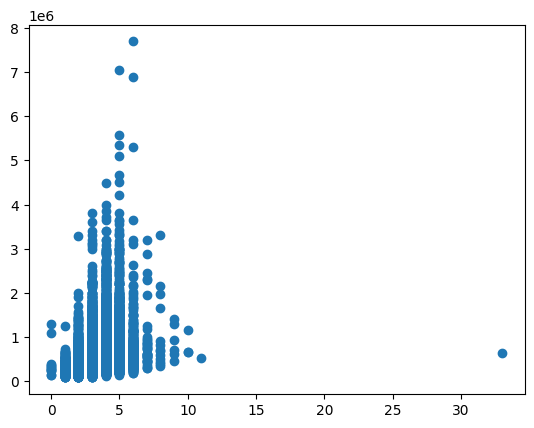

bathrooms


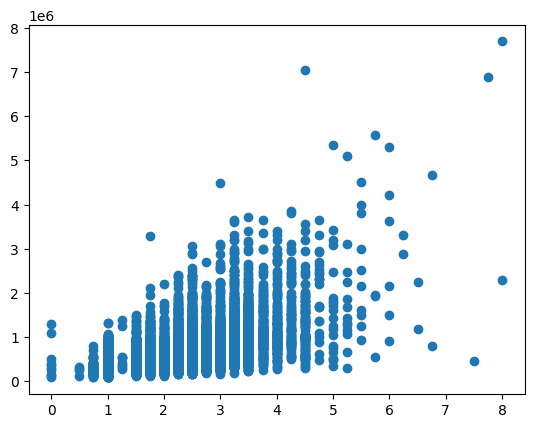

sqft_living


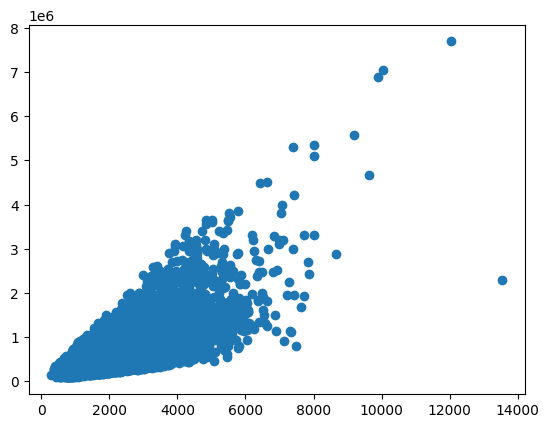

sqft_lot


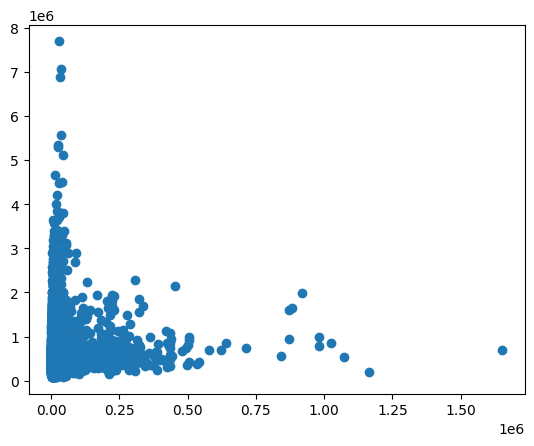

floors


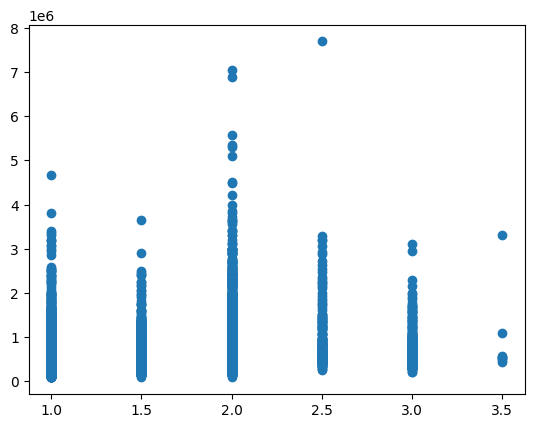

waterfront


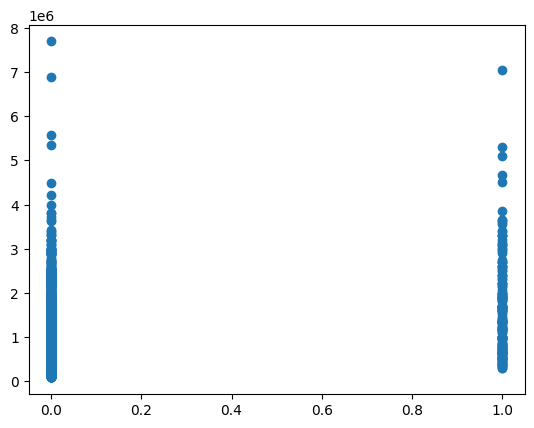

view


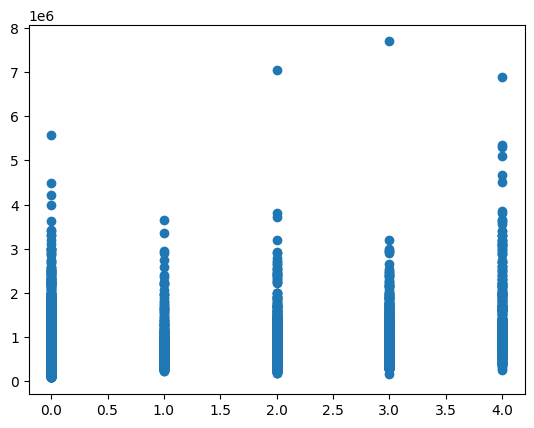

condition


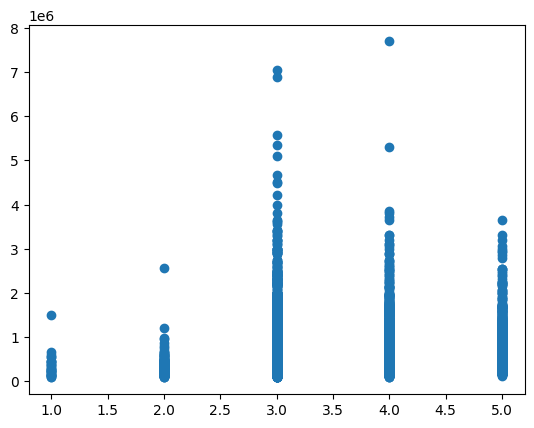

grade


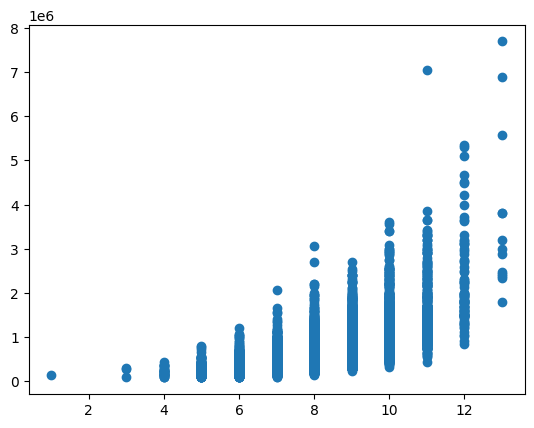

sqft_above


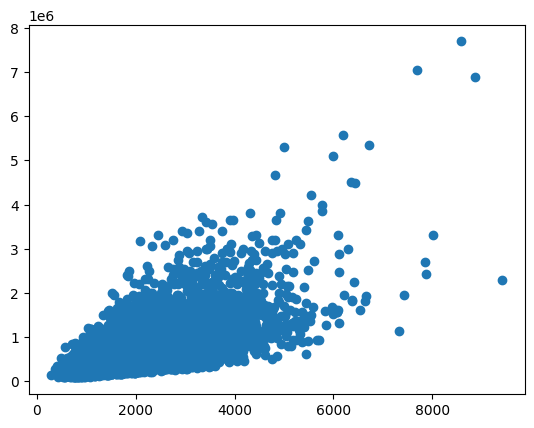

sqft_basement


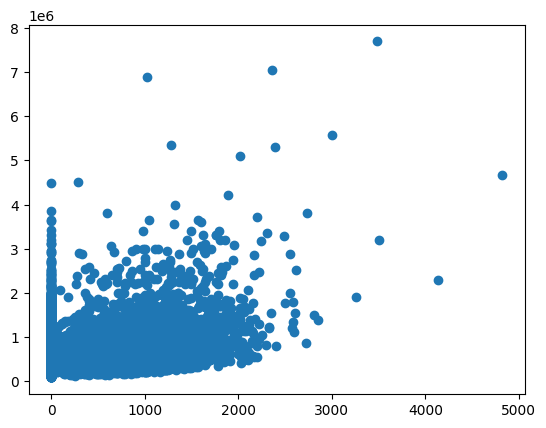

yr_built


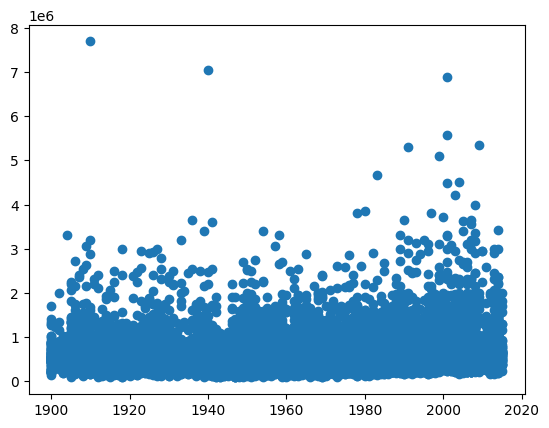

yr_renovated


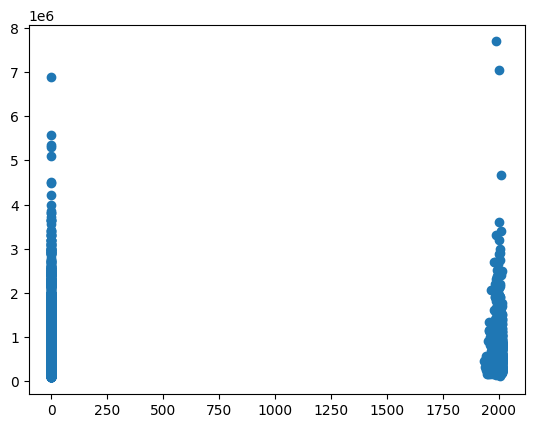

zipcode


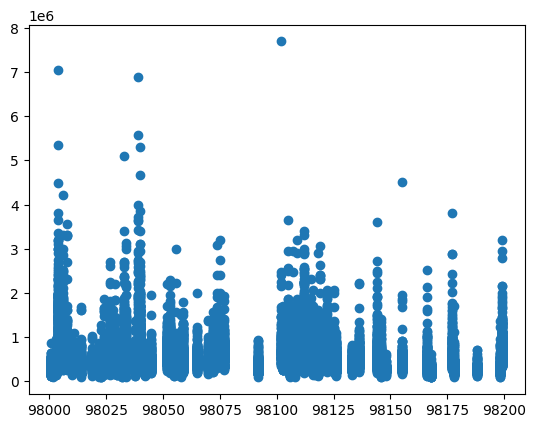

lat


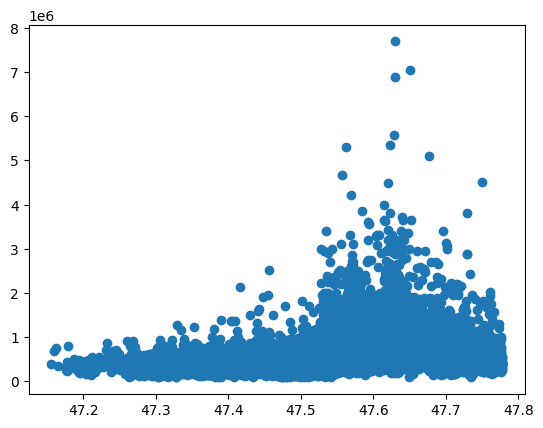

long


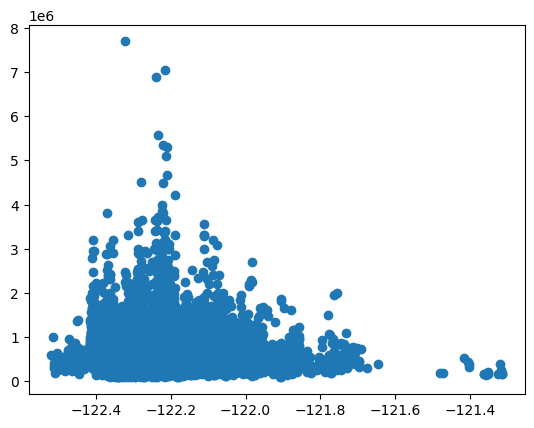

sqft_living15


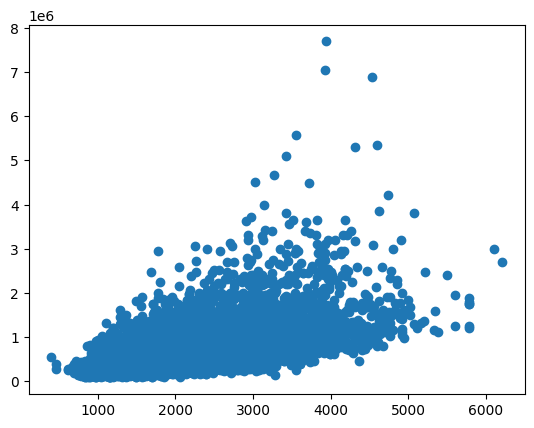

sqft_lot15


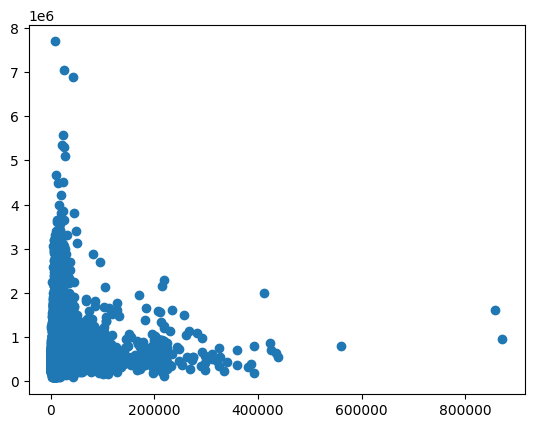

justdate


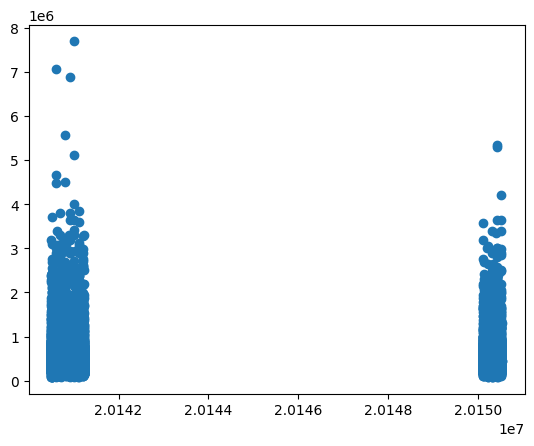

In [10]:
for c in house_sales_data.columns:
    if c != 'price':
        print(c)
        plt.scatter(house_sales_data[c], house_sales_data['price'])
        plt.show()

In [40]:
house_sales_data.drop(['sqft_lot', 'condition', 'yr_built', 'justdate'], axis= 1, inplace= True)

In [41]:


X_full = house_sales_data.drop('price', axis=1) 
y_full = house_sales_data['price'] 

Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.2)
model = LinearRegression()
model.fit(Xtrain, ytrain) 
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5)

207216.97729239133 210510.20698019982


In [42]:
# теперь масштабирование

X = house_sales_data.copy().drop('price', axis=1)

y = house_sales_data['price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(Xtrain) 
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.6716443769019856, 0.6785072842515576)

In [43]:
# L1

from sklearn.linear_model import LassoCV

n_alphas = 200 
alphas = np.linspace(0.1, 10, n_alphas) 

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=42) 
lasso_cv.fit(X, y)

d:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72026792902659.62, tolerance: 190436709323.93665
  model = cd_fast.enet_coordinate_descent_gram(
d:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72026083434175.75, tolerance: 190436709323.93665
  model = cd_fast.enet_coordinate_descent_gram(
d:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72025593320799.5, tolerance: 190436709323.93665
  model = cd_fast.enet_coordinate_descent_gram(
d:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You 

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=42)

In [44]:
lasso_cv.alpha_

0.1

In [45]:
# обучим модель с альфа 0.1

regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test)) # как будто ничего не поменялось

Scores: 0.6716443768986997 0.6785072853395204


d:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.445e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


In [47]:
# L2

from sklearn.linear_model import Ridge

for a in np.arange(0.1,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=0.1
Scores: 0.6785070795581087 48602242726.26028
[-24970.07111165   1758.76860261  91924.06753707 -18906.892701
  47274.73166208  47703.88112826  87265.92115292  83731.25812387
  33293.39815827  22903.13665258 -24465.97783546  92808.79697137
 -47162.93409364  14287.11036431  -4908.84553239]
alpha=2.6
Scores: 0.6785019549108493 48603017453.58445
[-24955.9072672    1776.59707474  91899.22270226 -18895.17283817
  47270.78148708  47700.74781957  87253.17962339  83704.7780231
  33291.6090179   22901.85310042 -24449.9114969   92793.837031
 -47149.58259626  14315.14993343  -4905.802643  ]
alpha=5.1
Scores: 0.6784968162305103 48603794302.38344
[-24941.75475345   1794.40350628  91874.40680722 -18883.46102213
  47266.83081197  47697.61735647  87240.44536842  83678.32837999
  33289.82273821  22900.56863609 -24433.85981126  92778.88426678
 -47136.23870922  14343.14851247  -4902.7628816 ]
alpha=7.6
Scores: 0.6784916635561273 48604573266.75599
[-24927.61355344   1812.18793987  91849.61980936 -

In [48]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(0, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e+00, 1.07189132e+00, 1.14895100e+00, 1.23155060e+00,
       1.32008840e+00, 1.41499130e+00, 1.51671689e+00, 1.62575567e+00,
       1.74263339e+00, 1.86791360e+00, 2.00220037e+00, 2.14614120e+00,
       2.30043012e+00, 2.46581108e+00, 2.64308149e+00, 2.83309610e+00,
       3.03677112e+00, 3.25508860e+00, 3.48910121e+00, 3.73993730e+00,
       4.00880633e+00, 4.29700470e+0...
       2.02550194e+05, 2.17111795e+05, 2.32720248e+05, 2.49450814e+05,
       2.67384162e+05, 2.86606762e+05, 3.07211300e+05, 3.29297126e+05,
       3.52970730e+05, 3.78346262e+05, 4.05546074e+05, 4.34701316e+05,
       4.65952567e+05, 4.99450512e+05, 5.35356668e+05, 5.73844165e+05,
       6.15098579e+05, 6.59318827e+05, 7.06718127e+05, 7.57525026e+05,
       8.11984499e+05, 8.70359136e+05, 9.32930403e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [49]:
ridge_cv.alpha_

1.516716888470923

In [50]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.6716443761460897 0.6785073000961577


d:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.447e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
